# Анализ train

In [3]:
import polars as pl 

train = pl.read_csv('input/training/source_data/train.csv')
train

msno,song_id,source_system_tab,source_screen_name,source_type,target
str,str,str,str,str,i64
"""FGtllVqz18RPiwJj/edr2gV78zirAi…","""BBzumQNXUHKdEBOB7mAJuzok+IJA1c…","""explore""","""Explore""","""online-playlist""",1
"""Xumu+NIjS6QYVxDS4/t3SawvJ7viT9…","""bhp/MpSNoqoxOIB+/l8WPqu6jldth4…","""my library""","""Local playlist more""","""local-playlist""",1
"""Xumu+NIjS6QYVxDS4/t3SawvJ7viT9…","""JNWfrrC7zNN7BdMpsISKa4Mw+xVJYN…","""my library""","""Local playlist more""","""local-playlist""",1
"""Xumu+NIjS6QYVxDS4/t3SawvJ7viT9…","""2A87tzfnJTSWqD7gIZHisolhe4DMdz…","""my library""","""Local playlist more""","""local-playlist""",1
"""FGtllVqz18RPiwJj/edr2gV78zirAi…","""3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT…","""explore""","""Explore""","""online-playlist""",1
…,…,…,…,…,…
"""6xdFzPlrasIDD95mQWXVC3Bg4ptnGY…","""VJTxizih/o28kXCbtPbIyWXScoXGvx…","""my library""","""Local playlist more""","""local-playlist""",1
"""ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+w…","""z1mqaU9YOX7T/PFDvUoWozdFq7rC3K…","""search""","""Search""","""song""",0
"""ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+w…","""750RprmFfLV0bymtDH88g24pLZGVi5…","""search""","""Search""","""song""",1


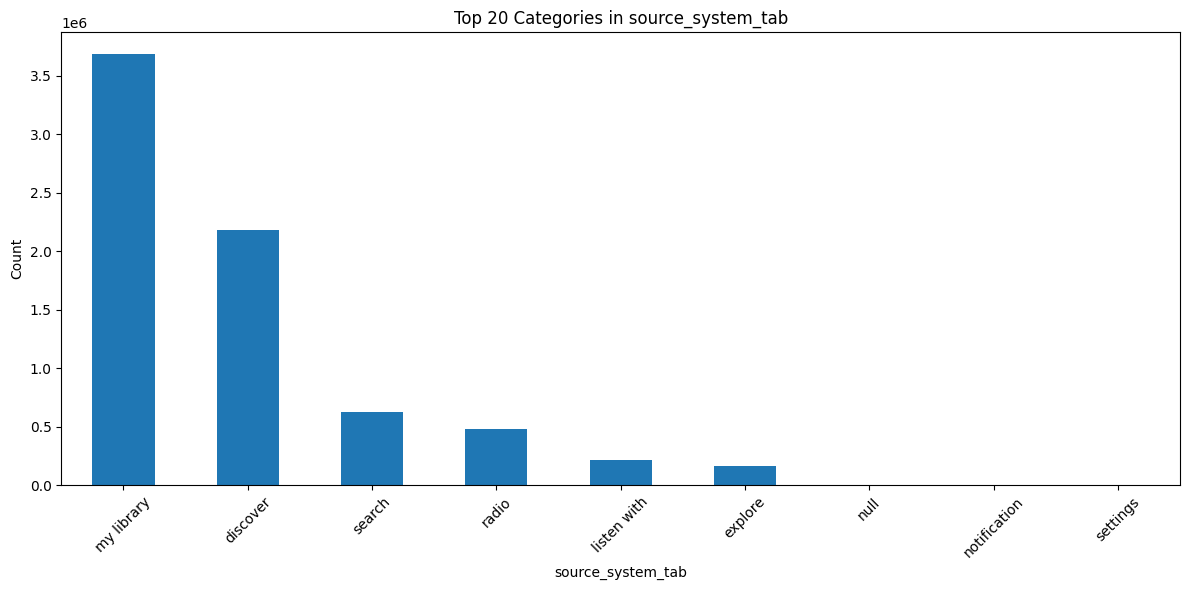

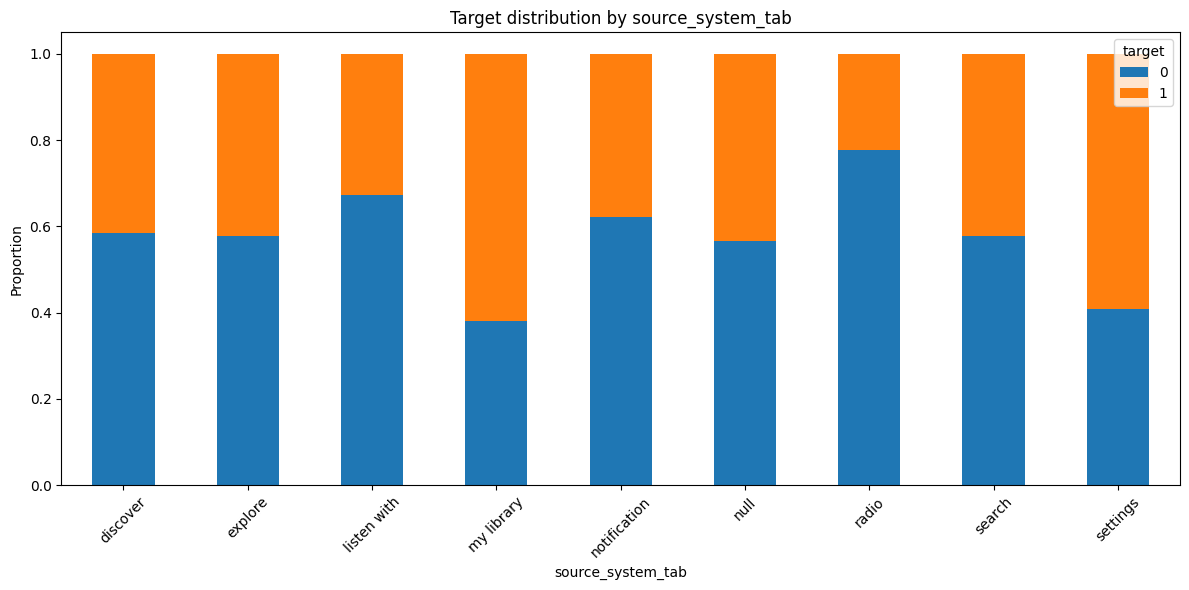

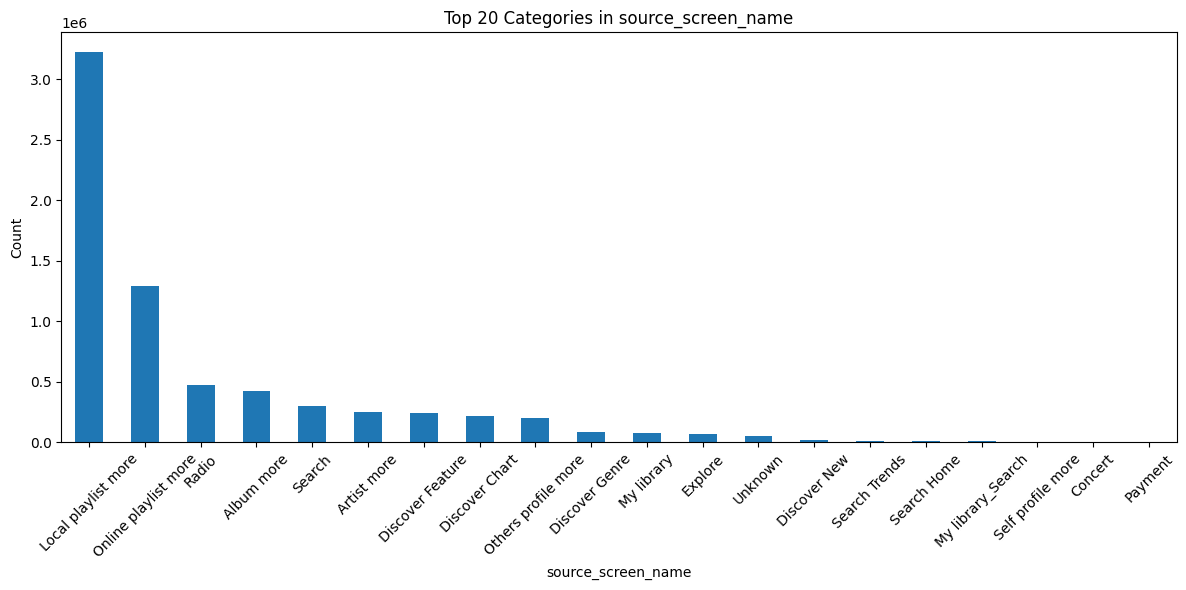

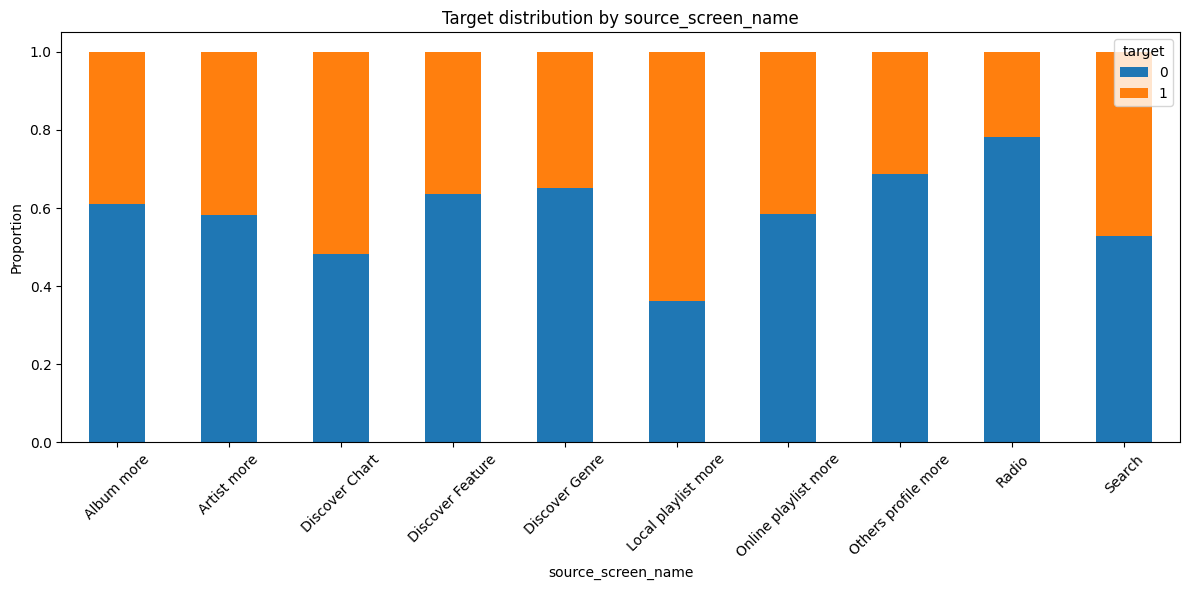

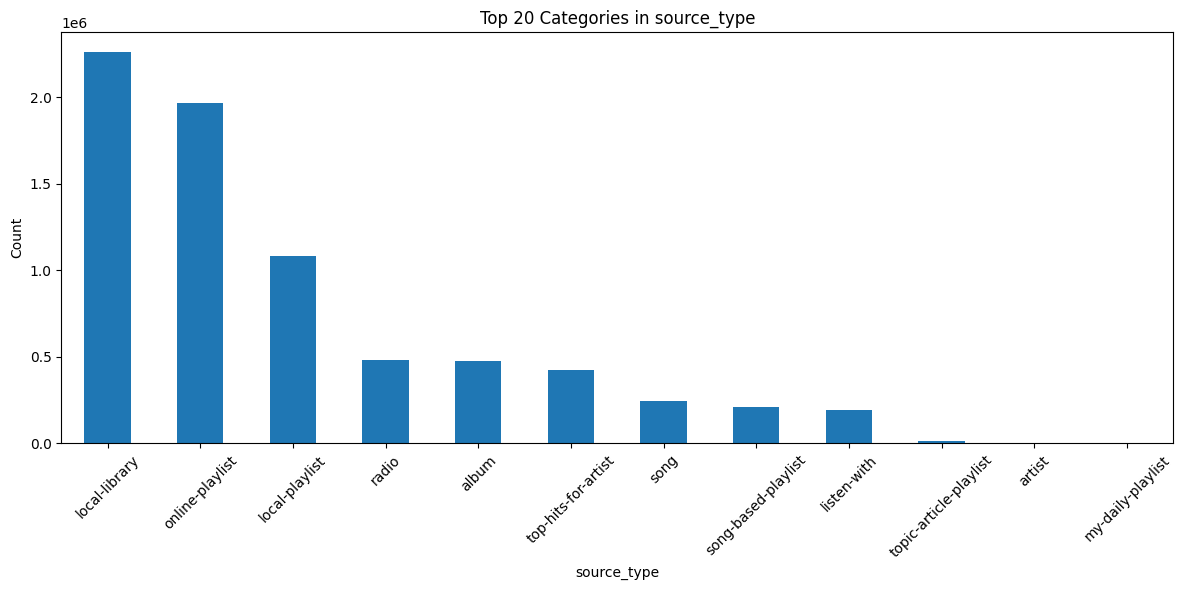

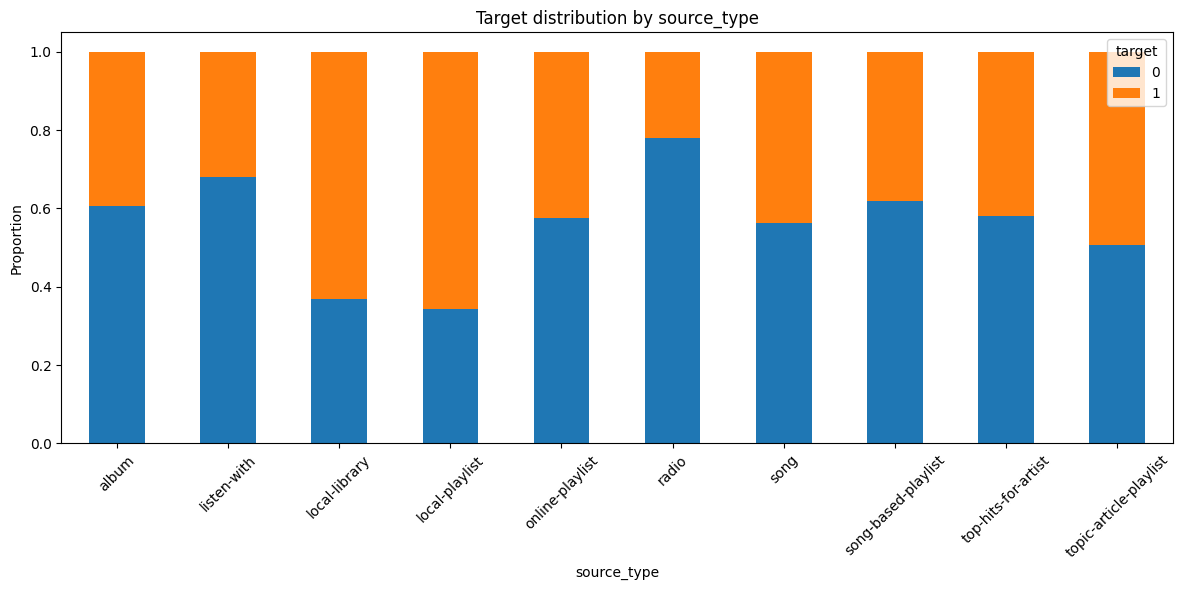

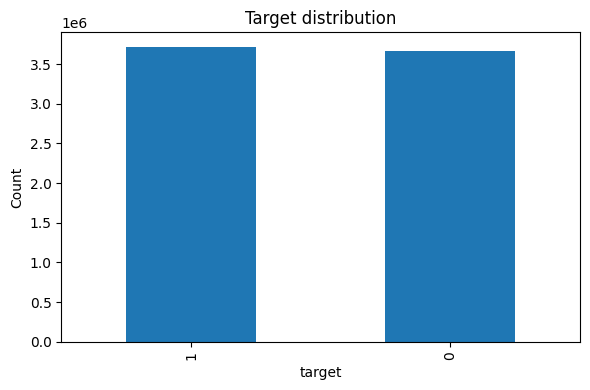

In [9]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Чтение CSV
train = pl.read_csv('input/training/source_data/train.csv')

# Конвертация в pandas для визуализации
df = train.to_pandas()

# Функция для построения гистограммы категорий
def plot_top_categories(column, top_n=20):
    plt.figure(figsize=(12, 6))
    df[column].value_counts().head(top_n).plot(kind='bar')
    plt.title(f'Top {top_n} Categories in {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Функция для построения stacked bar chart по таргету
def plot_target_distribution_by_category(column, top_n=10):
    top_values = df[column].value_counts().head(top_n).index
    subset = df[df[column].isin(top_values)]
    ctab = pd.crosstab(subset[column], subset['target'], normalize='index')
    ctab.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title(f'Target distribution by {column}')
    plt.xlabel(column)
    plt.ylabel('Proportion')
    plt.legend(title='target')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Визуализация категориальных признаков
categorical_columns = ['source_system_tab', 'source_screen_name', 'source_type']
for col in categorical_columns:
    plot_top_categories(col)
    plot_target_distribution_by_category(col)

# Отдельно: гистограмма целевой переменной
plt.figure(figsize=(6, 4))
df['target'].value_counts().plot(kind='bar')
plt.title('Target distribution')
plt.xlabel('target')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# songs

In [19]:
songs = pd.read_csv('input/training/source_data/songs.csv')
songs

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
...,...,...,...,...,...,...,...
2296315,lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=,20192,958,Catherine Collard,Robert Schumann (1810-1856),NaN,-1.0
2296316,nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=,273391,465,紀文惠 (Justine Chi),NaN,NaN,3.0
2296317,9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=,445172,1609,Various Artists,NaN,NaN,52.0
2296318,UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=,172669,465,Peter Paul & Mary,NaN,NaN,52.0


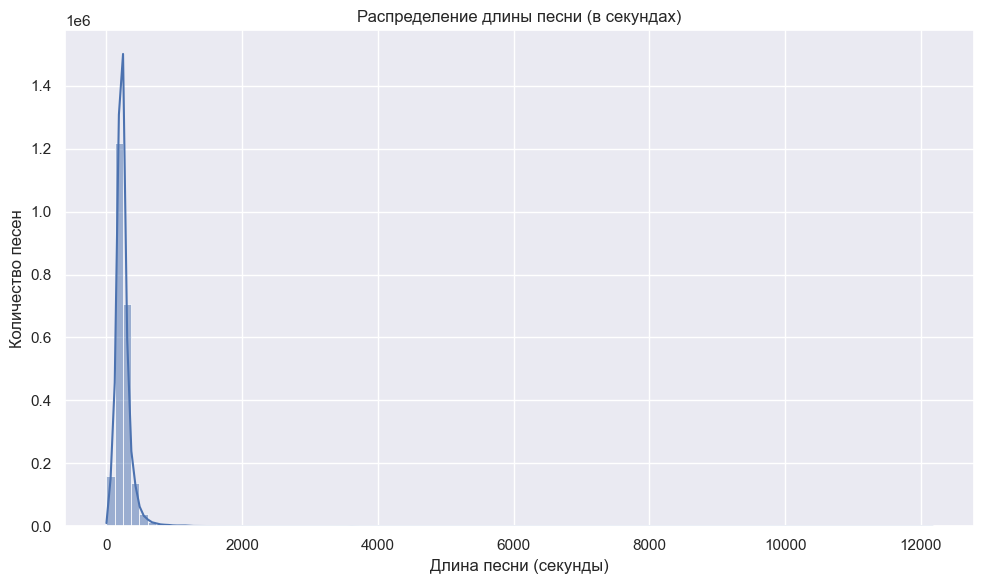

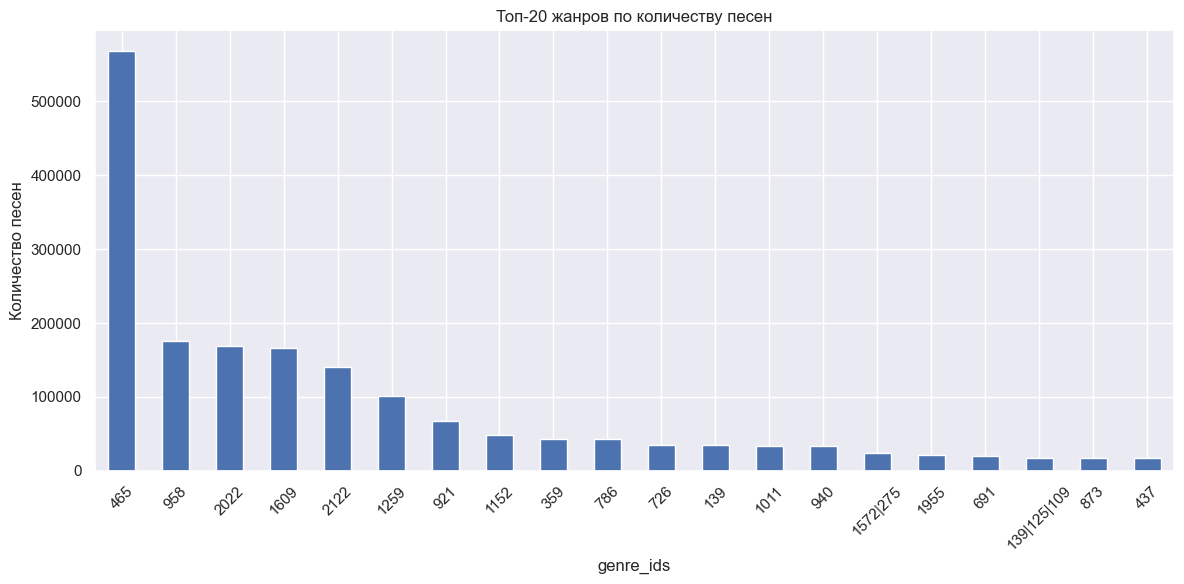

/var/folders/nr/rnc72dkn53v593_t7w0pmc9w0000gn/T/ipykernel_57243/3758896827.py:37: UserWarning: Glyph 35388 (\N{CJK UNIFIED IDEOGRAPH-8A3C}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/nr/rnc72dkn53v593_t7w0pmc9w0000gn/T/ipykernel_57243/3758896827.py:37: UserWarning: Glyph 32882 (\N{CJK UNIFIED IDEOGRAPH-8072}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/nr/rnc72dkn53v593_t7w0pmc9w0000gn/T/ipykernel_57243/3758896827.py:37: UserWarning: Glyph 38899 (\N{CJK UNIFIED IDEOGRAPH-97F3}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/nr/rnc72dkn53v593_t7w0pmc9w0000gn/T/ipykernel_57243/3758896827.py:37: UserWarning: Glyph 27138 (\N{CJK UNIFIED IDEOGRAPH-6A02}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/nr/rnc72dkn53v593_t7w0pmc9w0000gn/T/ipykernel_57243/3758896827.py:37: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/nr/rnc72dkn53v593_t7w0pmc9w0000gn/T/i

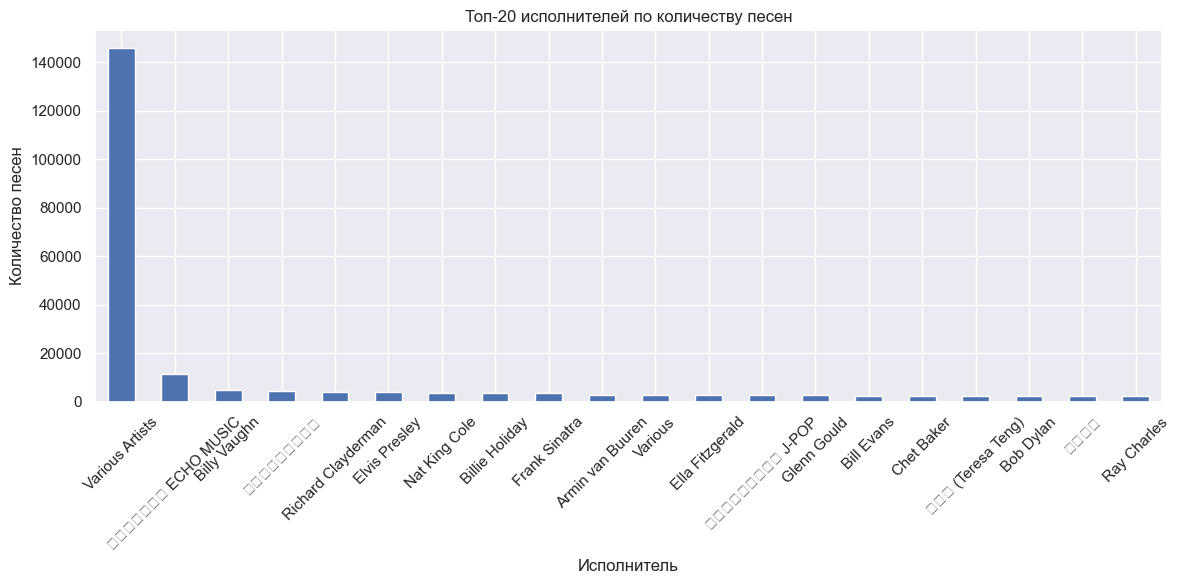

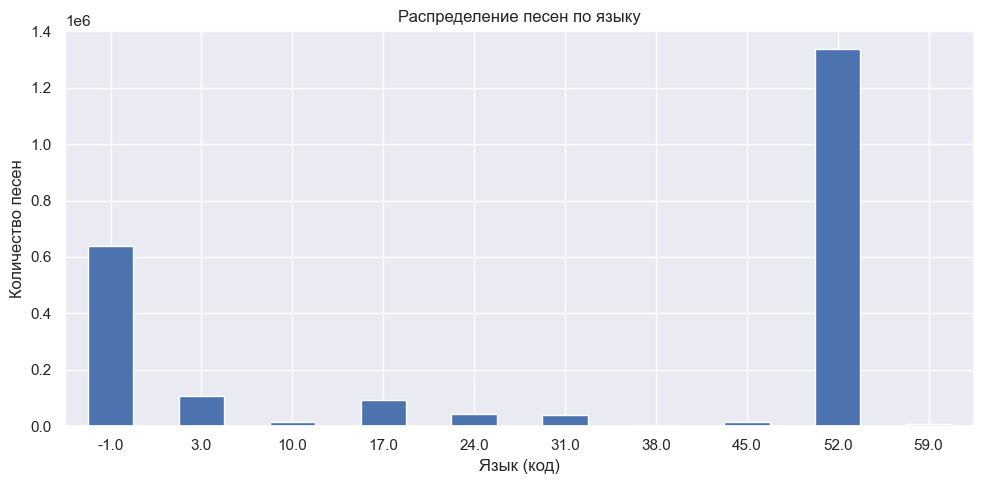

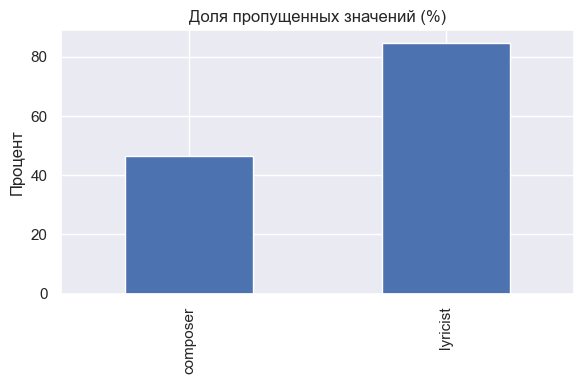

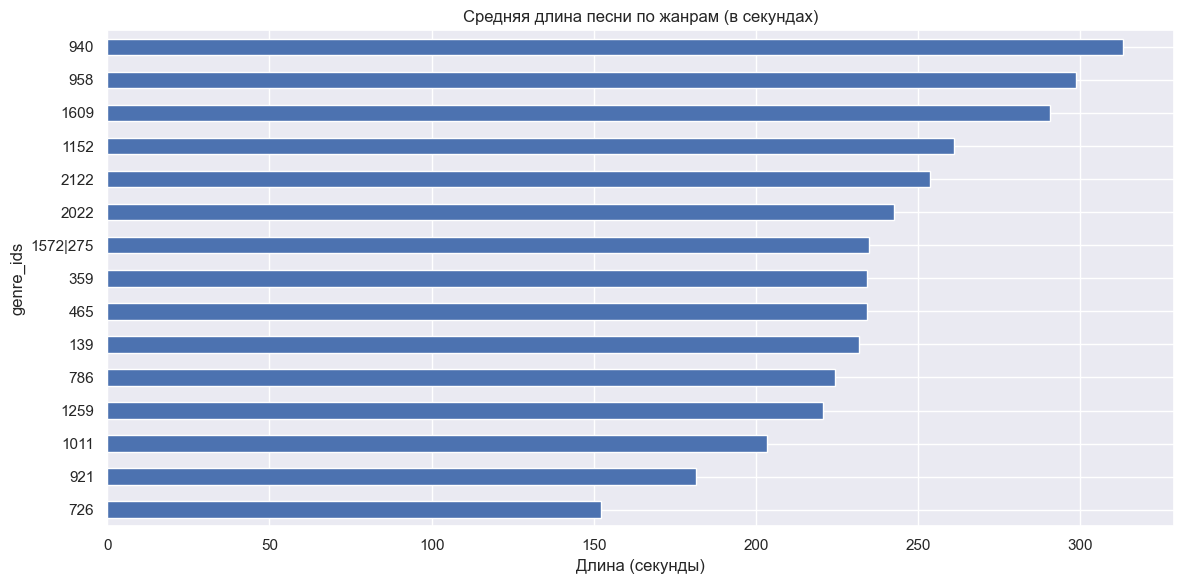

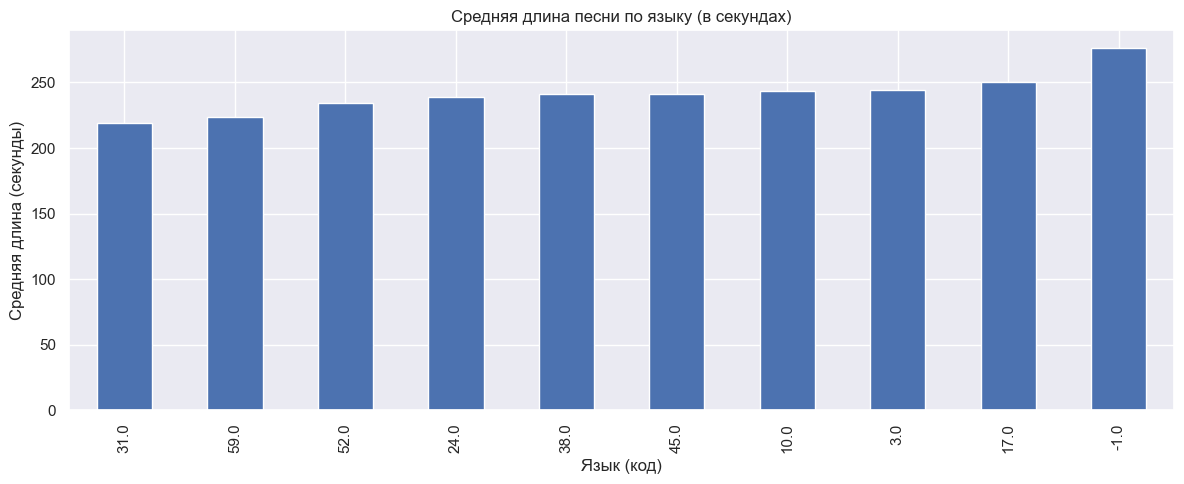

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
songs = pd.read_csv('input/training/source_data/songs.csv')

# Увеличение масштаба шрифтов
sns.set(font_scale=1.0)

# --- 1. Распределение длины песни (в секундах) ---
plt.figure(figsize=(10, 6))
sns.histplot(songs['song_length'] / 1000, bins=100, kde=True)
plt.title('Распределение длины песни (в секундах)')
plt.xlabel('Длина песни (секунды)')
plt.ylabel('Количество песен')
plt.tight_layout()
plt.show()

# --- 2. Топ-20 жанров по количеству песен ---
plt.figure(figsize=(12, 6))
songs['genre_ids'].value_counts().head(20).plot(kind='bar')
plt.title('Топ-20 жанров по количеству песен')
plt.xlabel('genre_ids')
plt.ylabel('Количество песен')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 3. Топ-20 исполнителей по количеству песен ---
plt.figure(figsize=(12, 6))
songs['artist_name'].value_counts().head(20).plot(kind='bar')
plt.title('Топ-20 исполнителей по количеству песен')
plt.xlabel('Исполнитель')
plt.ylabel('Количество песен')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 4. Распределение песен по языкам ---
plt.figure(figsize=(10, 5))
songs['language'].value_counts().sort_index().plot(kind='bar')
plt.title('Распределение песен по языку')
plt.xlabel('Язык (код)')
plt.ylabel('Количество песен')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# --- 5. Доля пропущенных значений в composer и lyricist ---
plt.figure(figsize=(6, 4))
songs[['composer', 'lyricist']].isnull().mean().mul(100).plot(kind='bar')
plt.title('Доля пропущенных значений (%)')
plt.ylabel('Процент')
plt.tight_layout()
plt.show()

# --- 6. Средняя длина песни по жанру (топ-15 жанров) ---
top_genres = songs['genre_ids'].value_counts().head(15).index
genre_lengths = songs[songs['genre_ids'].isin(top_genres)].groupby('genre_ids')['song_length'].mean() / 1000
plt.figure(figsize=(12, 6))
genre_lengths.sort_values().plot(kind='barh')
plt.title('Средняя длина песни по жанрам (в секундах)')
plt.xlabel('Длина (секунды)')
plt.ylabel('genre_ids')
plt.tight_layout()
plt.show()

# --- 7. Средняя длина песни по языкам ---
plt.figure(figsize=(12, 5))
songs.groupby('language')['song_length'].mean().div(1000).sort_values().plot(kind='bar')
plt.title('Средняя длина песни по языку (в секундах)')
plt.xlabel('Язык (код)')
plt.ylabel('Средняя длина (секунды)')
plt.tight_layout()
plt.show()

In [19]:
songs['song_id'].nunique()

2296320

In [11]:
songs_extra = pd.read_csv('input/training/source_data/song_extra_info.csv')
songs_extra

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001
...,...,...,...
2295966,hLnetpF6UbPg28sSfXnPE2vsdaGsLvddlXEdJR4VTIA=,Deep Breathing,PLL431720793
2295967,N+6vJ8actKQm0S3Fpf4elipTjoAo9ev28aA5FJN5e40=,In Hiding,US5UL1519827
2295968,pv35uG0ts05mWtirM/AMOWEzbHxIVart5ZzRXqKUY1c=,Il Est Ne Le Divin Enfant,PLL431502294
2295969,QSySnm8jt2Go7byY34/PxsZP6dPCins2j2cyYquNhBo=,The Exodus Song,DEPZ69316095


Обзор данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   song_id       object
 1   name          object
 2   isrc          object
 3   country_code  object
dtypes: object(4)
memory usage: 70.1+ MB
None

Пример данных:
                                        song_id             name  \
0  LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=               我們   
1  ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=  Let Me Love You   
2  u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=              原諒我   
3  92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=          Classic   
4  0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=             愛投羅網   

           isrc country_code  
0  TWUM71200043           TW  
1  QMZSY1600015           QM  
2  TWA530887303           TW  
3  USSM11301446           US  
4  TWA471306001           TW  

Уникальных названий песен: 1,168,978


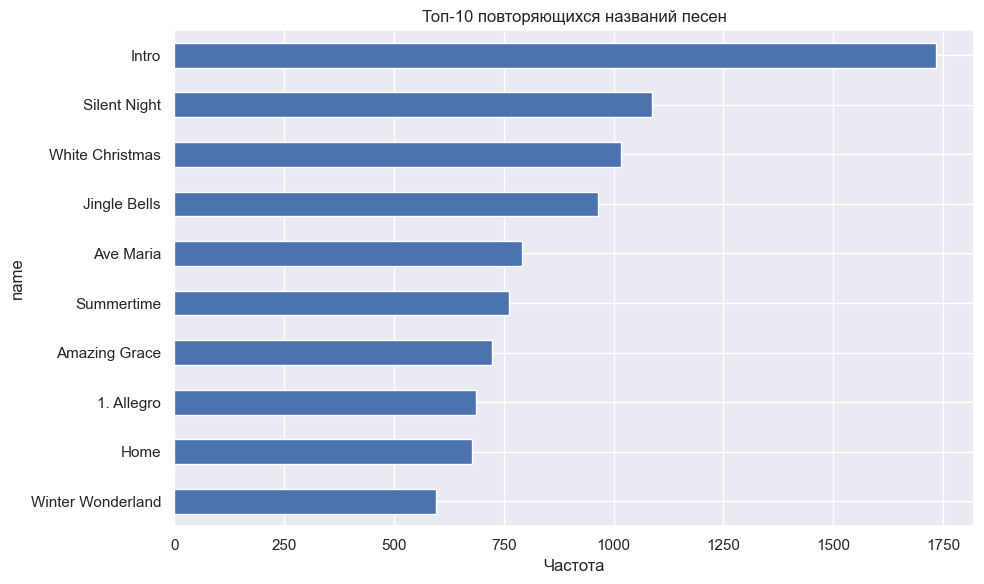


Количество ISRC-кодов, используемых повторно: 186,494


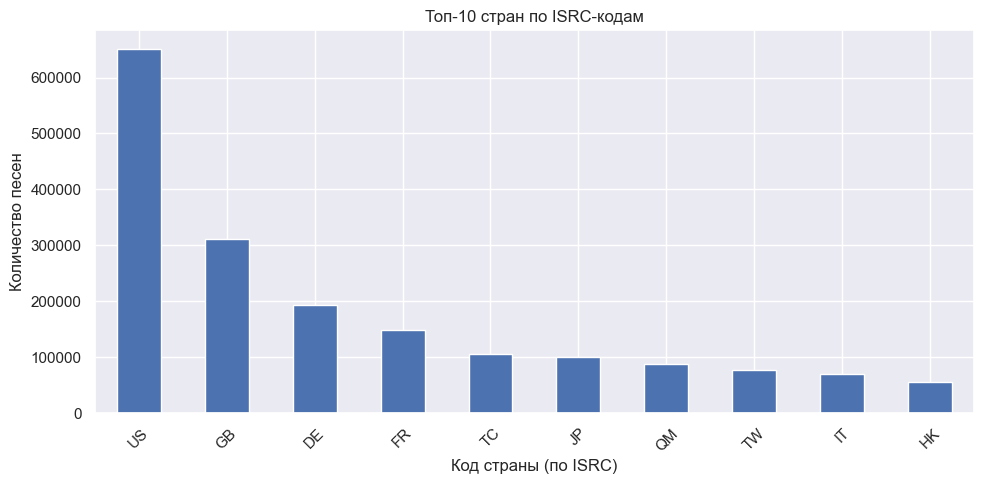

In [14]:
# Быстрый обзор
print("Обзор данных:")
print(songs_extra.info())
print("\nПример данных:")
print(songs_extra.head())

# 1. Сколько уникальных названий песен
unique_titles = songs_extra['name'].nunique()
print(f"\nУникальных названий песен: {unique_titles:,}")

# 2. Самые популярные названия (повторы по имени)
top_names = songs_extra['name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_names.plot(kind='barh')
plt.title('Топ-10 повторяющихся названий песен')
plt.xlabel('Частота')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 3. Частота ISRC-кодов (возможны повторы)
isrc_counts = songs_extra['isrc'].value_counts()
duplicates = isrc_counts[isrc_counts > 1]
print(f"\nКоличество ISRC-кодов, используемых повторно: {len(duplicates):,}")

# 4. Страна происхождения по ISRC (если первые 2 символа верны)
songs_extra['country_code'] = songs_extra['isrc'].str[:2]
country_distribution = songs_extra['country_code'].value_counts().head(10)

plt.figure(figsize=(10, 5))
country_distribution.plot(kind='bar')
plt.title('Топ-10 стран по ISRC-кодам')
plt.ylabel('Количество песен')
plt.xlabel('Код страны (по ISRC)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
songs_extra['song_id'].nunique()

2295971

In [21]:
members = pd.read_csv('input/training/source_data/members.csv')
members

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
...,...,...,...,...,...,...,...
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920


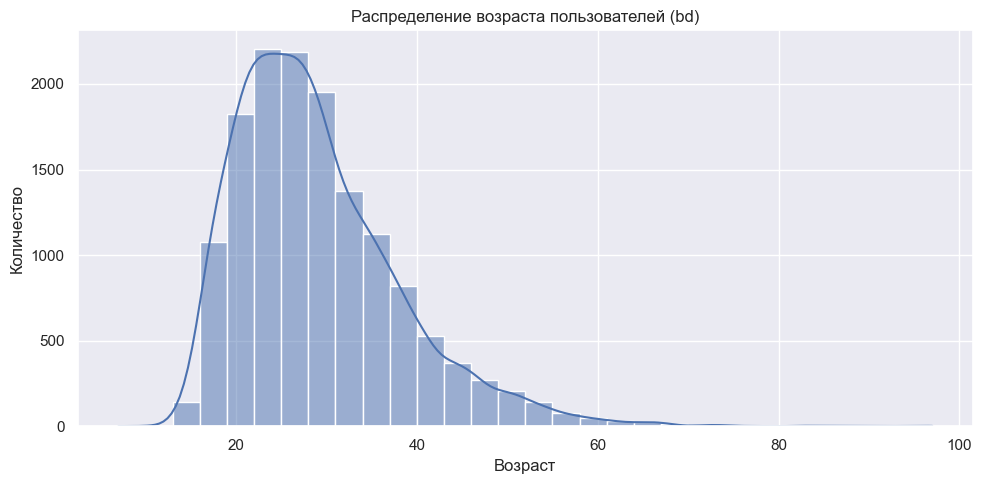

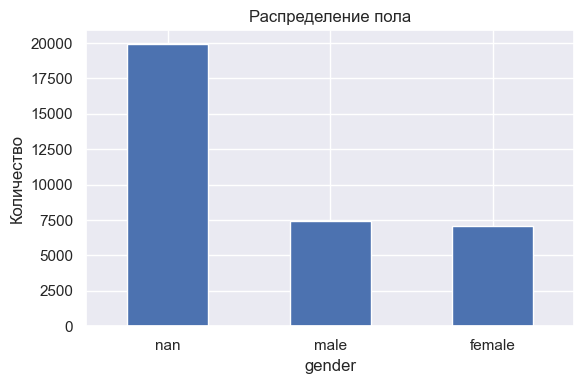

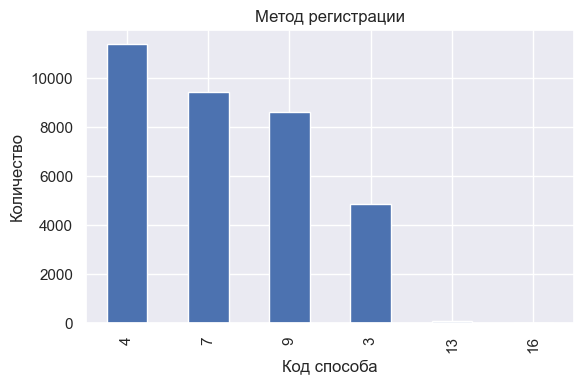

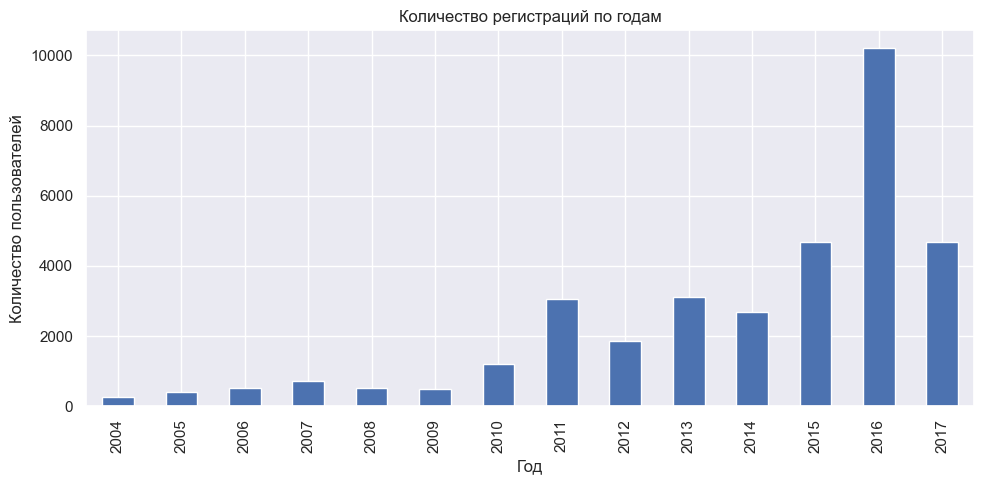

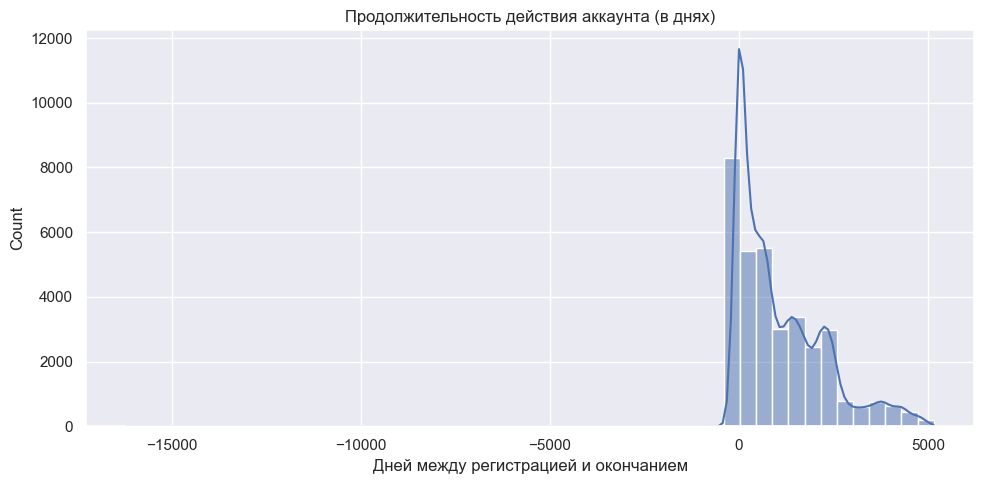

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
members = pd.read_csv('input/training/source_data/members.csv')

# Преобразуем даты
members['registration_init_time'] = pd.to_datetime(members['registration_init_time'], format='%Y%m%d')
members['expiration_date'] = pd.to_datetime(members['expiration_date'], format='%Y%m%d')

# Отбросим явно некорректные значения возраста
members_clean = members[(members['bd'] > 5) & (members['bd'] < 100)]

# --------- 1. Распределение возраста ---------
plt.figure(figsize=(10, 5))
sns.histplot(members_clean['bd'], bins=30, kde=True)
plt.title('Распределение возраста пользователей (bd)')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.tight_layout()
plt.show()

# --------- 2. Пол пользователей ---------
plt.figure(figsize=(6, 4))
members['gender'].value_counts(dropna=False).plot(kind='bar')
plt.title('Распределение пола')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# --------- 3. Методы регистрации ---------
plt.figure(figsize=(6, 4))
members['registered_via'].value_counts().plot(kind='bar')
plt.title('Метод регистрации')
plt.xlabel('Код способа')
plt.ylabel('Количество')
plt.tight_layout()
plt.show()

# --------- 4. Динамика регистрации по годам ---------
plt.figure(figsize=(10, 5))
members['registration_year'] = members['registration_init_time'].dt.year
members['registration_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Количество регистраций по годам')
plt.xlabel('Год')
plt.ylabel('Количество пользователей')
plt.tight_layout()
plt.show()

# --------- 5. Срок действия аккаунта ---------
members['membership_days'] = (members['expiration_date'] - members['registration_init_time']).dt.days
plt.figure(figsize=(10, 5))
sns.histplot(members['membership_days'], bins=50, kde=True)
plt.title('Продолжительность действия аккаунта (в днях)')
plt.xlabel('Дней между регистрацией и окончанием')
plt.tight_layout()
plt.show()

In [22]:
data1 = pd.read_csv('input/training/train.csv')
data1

,msno,song_id,source_system_tab,source_screen_name,source_type,target,msno_source_system_tab_prob,msno_source_screen_name_prob,msno_source_type_prob,song_embeddings_dot,...,msno_50000_after_cnt,song_50000_after_cnt,before_song_id,after_song_id,before_source_type,after_source_type,before_source_screen_name,after_source_screen_name,before_timestamp,after_timestamp
0,9176,86884,1,7,6,1,0.167208,0.123534,0.284664,0.502255,...,3.988984,1.386294,86884,38706,6,6,7,7,3.782848,2.088611
1,19273,260594,3,8,4,1,0.856164,0.856164,0.200000,0.002684,...,2.302585,0.693147,260594,140755,4,4,8,8,3.782848,1.018278
2,19273,140755,3,8,4,1,0.856164,0.856164,0.200000,0.003269,...,2.197225,0.693147,260594,27577,4,4,8,8,1.018278,1.018278
3,19273,27577,3,8,4,1,0.856164,0.856164,0.200000,0.002684,...,2.079442,0.693147,140755,221459,4,4,8,8,1.018278,1.841386
4,9176,38706,1,7,6,1,0.167208,0.123534,0.284664,0.748764,...,3.970292,1.386294,86884,35087,6,6,7,7,2.088611,1.018278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7377413,4726,218734,3,8,4,1,0.781790,0.747253,0.452119,0.040084,...,3.465736,1.098612,205706,176383,4,4,8,8,7.546031,6.550800
7377414,20402,413719,6,17,8,0,0.031136,0.012821,0.012821,0.389409,...,2.484907,1.945910,340595,59992,6,8,3,17,11.471992,1.018278
7377415,20402,59992,6,17,8,1,0.031136,0.012821,0.012821,0.298820,...,2.397895,4.189655,413719,145837,8,3,17,8,1.018278,9.519177
7377416,1371,119278,0,5,6,1,0.717448,0.130208,0.740885,0.013422,...,2.708050,0.693147,105264,144048,6,6,5,5,6.552930,1.018278


In [23]:
data2 = pd.read_csv('input/training/train_part.csv')
data2

,msno,song_id,source_system_tab,source_screen_name,source_type,target,msno_source_system_tab_prob,msno_source_screen_name_prob,msno_source_type_prob,song_embeddings_dot,...,msno_50000_after_cnt,song_50000_after_cnt,before_song_id,after_song_id,before_source_type,after_source_type,before_source_screen_name,after_source_screen_name,before_timestamp,after_timestamp
0,19273,260594,3,8,4,1,0.856164,0.856164,0.200000,0.002684,...,2.302585,0.693147,260594,140755,4,4,8,8,3.782848,1.018278
1,19273,140755,3,8,4,1,0.856164,0.856164,0.200000,0.003269,...,2.197225,0.693147,260594,27577,4,4,8,8,1.018278,1.018278
2,19273,27577,3,8,4,1,0.856164,0.856164,0.200000,0.002684,...,2.079442,0.693147,140755,221459,4,4,8,8,1.018278,1.841386
3,9176,38706,1,7,6,1,0.167208,0.123534,0.284664,0.748764,...,3.970292,1.386294,86884,35087,6,6,7,7,2.088611,1.018278
4,9176,35087,1,7,6,1,0.167208,0.123534,0.284664,2.161053,...,3.951244,2.079442,38706,258674,6,6,7,7,1.018278,1.512232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7056967,4726,218734,3,8,4,1,0.781790,0.747253,0.452119,0.040084,...,3.465736,1.098612,205706,176383,4,4,8,8,7.546031,6.550800
7056968,20402,413719,6,17,8,0,0.031136,0.012821,0.012821,0.389409,...,2.484907,1.945910,340595,59992,6,8,3,17,11.471992,1.018278
7056969,20402,59992,6,17,8,1,0.031136,0.012821,0.012821,0.298820,...,2.397895,4.189655,413719,145837,8,3,17,8,1.018278,9.519177
7056970,1371,119278,0,5,6,1,0.717448,0.130208,0.740885,0.013422,...,2.708050,0.693147,105264,144048,6,6,5,5,6.552930,1.018278


In [24]:
data3 = pd.read_csv('input/training/train_part_add.csv')
data3

,msno_artist_name_prob,msno_first_genre_id_prob,msno_xxx_prob,msno_language_prob,msno_yy_prob,song_source_system_tab_prob,song_source_screen_name_prob,song_source_type_prob,source,msno_source_prob
0,0.036337,0.062500,0.001453,0.183140,0.005814,1.000000,1.000000,1.000000,284,0.206395
1,0.002907,0.062500,0.068314,0.183140,0.033430,0.333333,0.333333,0.333333,284,0.206395
2,0.001453,0.001453,0.001453,0.014535,0.058140,1.000000,1.000000,1.000000,284,0.206395
3,0.000146,0.006591,0.000293,0.532005,0.156877,0.066524,0.042918,0.678112,137,0.118793
4,0.000293,0.104585,0.106489,0.532005,0.156877,0.021132,0.009057,0.349434,137,0.118793
...,...,...,...,...,...,...,...,...,...,...
7056967,0.003552,0.090586,0.007105,0.264654,0.014210,0.352041,0.306122,0.168367,284,0.426288
7056968,0.000967,0.423598,0.023211,0.783366,0.095745,0.037975,0.057384,0.048101,477,0.013540
7056969,0.000967,0.423598,0.002901,0.041586,0.095745,0.055593,0.056183,0.047591,477,0.013540
7056970,0.002604,0.132812,0.005208,0.451823,0.010417,0.600000,0.333333,0.800000,32,0.130208


# Тест модели

In [ ]:
# Установка необходимых библиотек и системных утилит
!pip install pydot
!apt-get install -y graphviz

# Импорт необходимых модулей
from keras.models import load_model
from keras.utils import model_to_dot
from IPython.display import Image, display

# Загрузка модели
model = load_model('model2.keras')

# Генерация графа модели в формате DOT
dot_graph = model_to_dot(model, show_shapes=True, show_layer_names=True)
dot_graph.write('model1.dot')  # Сохраняем как .dot файл

# Преобразование .dot в .png с помощью утилиты dot из Graphviz
!dot -Tpng model1.dot -o model1_architecture.png

# Отображение изображения архитектуры модели
display(Image(filename='model1_architecture.png'))

zsh:1: command not found: apt-get


ValueError: File format not supported: filepath=meta_logreg.pkl. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(meta_logreg.pkl, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

AttributeError: 'LogisticRegression' object has no attribute 'feature_names_in_'

In [4]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ city_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender_input        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ registered_via_inp… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ msno_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ city_embeddings     │ (None, 1, 11)     │        231 │ city_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender_embeddings   │ (None, 1, 11)     │         33 │ gender_input[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ registered_via_emb… │ (None, 1, 11)     │         66 │ registered_via_i… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ usr_feat            │ (None, 1, 58)     │  1,995,374 │ msno_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ usr_component       │ (None, 1, 48)     │  1,651,344 │ msno_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ usr_artist_compone… │ (None, 1, 16)     │    550,448 │ msno_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ artist_name_input   │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ language_input      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cc_input            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ first_genre_id_inp… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ second_genre_id_in… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ song_id_input       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ city_flatten        │ (None, 11)        │          0 │ city_embeddings[

 Total params: 43,109,531 (164.45 MB)

 Trainable params: 3,292,380 (12.56 MB)

 Non-trainable params: 36,524,769 (139.33 MB)

 Optimizer params: 3,292,382 (12.56 MB)

In [18]:
from tensorflow.keras.models import load_model

# Загрузка модели
model = load_model('model2.keras')  # Убедитесь, что файл находится в правильной директории

# Вывод структуры модели
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ city_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender_input        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ registered_via_inp… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ msno_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ city_embeddings     │ (None, 1, 11)     │        231 │ city_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender_embeddings   │ (None, 1, 11)     │         33 │ gender_input[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ registered_via_emb… │ (None, 1, 11)     │         66 │ registered_via_i… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ usr_feat            │ (None, 1, 58)     │  1,995,374 │ msno_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ usr_component       │ (None, 1, 48)     │  1,651,344 │ msno_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ usr_artist_compone… │ (None, 1, 16)     │    550,448 │ msno_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ artist_name_input   │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ language_input      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cc_input            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ first_genre_id_inp… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ second_genre_id_in… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ song_id_input       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ city_flatten        │ (None, 11)        │          0 │ city_embeddings[

 Total params: 43,109,531 (164.45 MB)

 Trainable params: 3,292,380 (12.56 MB)

 Non-trainable params: 36,524,769 (139.33 MB)

 Optimizer params: 3,292,382 (12.56 MB)

In [21]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
sns.set(font_scale=1.1, rc={"axes.titlesize":14, "axes.labelsize":12})
train        = pd.read_csv('input/training/source_data/train.csv')
songs        = pd.read_csv('input/training/source_data/songs.csv')
songs_extra  = pd.read_csv('input/training/source_data/song_extra_info.csv')
members      = pd.read_csv('input/training/source_data/members.csv')

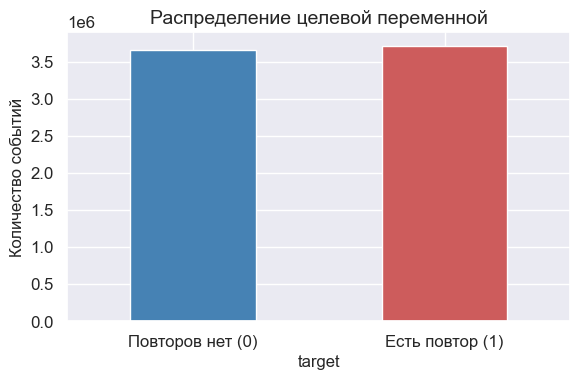

In [22]:
plt.figure(figsize=(6,4))
train['target'].value_counts().sort_index().plot(kind='bar', color=['steelblue','indianred'])
plt.title('Распределение целевой переменной')
plt.xticks([0,1], ['Повторов нет (0)', 'Есть повтор (1)'], rotation=0)
plt.ylabel('Количество событий')
plt.tight_layout(); plt.show()

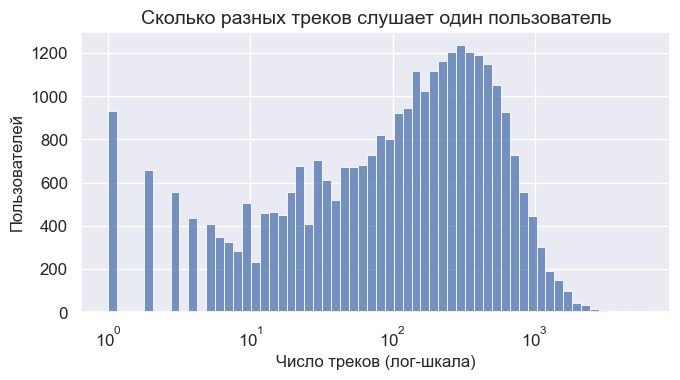

In [23]:
user_cnt = train.groupby('msno')['song_id'].nunique()
plt.figure(figsize=(7,4))
sns.histplot(user_cnt, bins=60, log_scale=True)
plt.title('Сколько разных треков слушает один пользователь')
plt.xlabel('Число треков (лог-шкала)'); plt.ylabel('Пользователей')
plt.tight_layout(); plt.show()

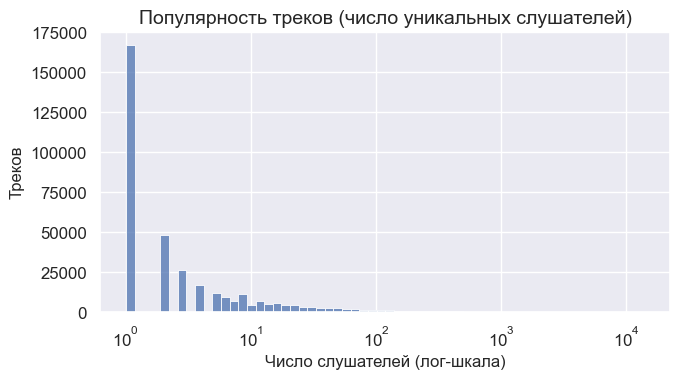

In [24]:
song_listeners = train.groupby('song_id')['msno'].nunique()
plt.figure(figsize=(7,4))
sns.histplot(song_listeners, bins=60, log_scale=True)
plt.title('Популярность треков (число уникальных слушателей)')
plt.xlabel('Число слушателей (лог-шкала)'); plt.ylabel('Треков')
plt.tight_layout(); plt.show()

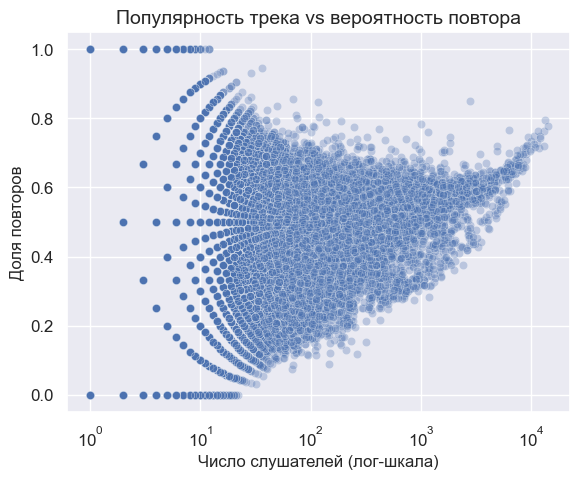

In [25]:
song_stats = train.groupby('song_id').agg(listeners=('msno','nunique'),
                                          repeat_rate=('target','mean'))
plt.figure(figsize=(6,5))
sns.scatterplot(data=song_stats, x='listeners', y='repeat_rate', alpha=.3)
plt.xscale('log')
plt.title('Популярность трека vs вероятность повтора')
plt.xlabel('Число слушателей (лог-шкала)')
plt.ylabel('Доля повторов')
plt.tight_layout(); plt.show()

/var/folders/nr/rnc72dkn53v593_t7w0pmc9w0000gn/T/ipykernel_57243/2741584606.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  box = tmp.groupby(bins)['target'].mean().reset_index()


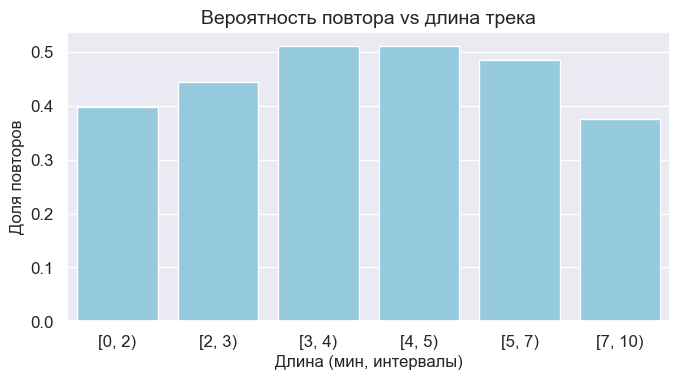

In [26]:
tmp = songs[['song_id','song_length']].merge(train[['song_id','target']], on='song_id')
tmp['len_min'] = (tmp['song_length']/60000).round(1)
bins = pd.cut(tmp['len_min'], bins=[0,2,3,4,5,7,10], right=False)
box = tmp.groupby(bins)['target'].mean().reset_index()
plt.figure(figsize=(7,4))
sns.barplot(data=box, x='len_min', y='target', color='skyblue')
plt.title('Вероятность повтора vs длина трека')
plt.xlabel('Длина (мин, интервалы)'); plt.ylabel('Доля повторов')
plt.tight_layout(); plt.show()

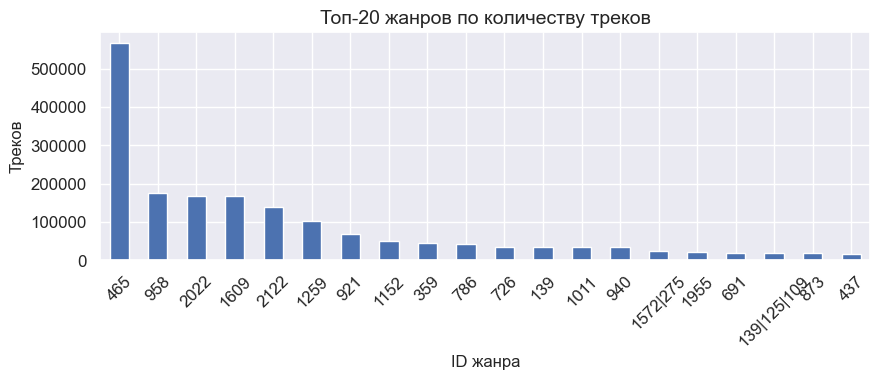

In [27]:
top_genres = songs['genre_ids'].value_counts().head(20)
plt.figure(figsize=(9,4))
top_genres.plot(kind='bar')
plt.title('Топ-20 жанров по количеству треков')
plt.xlabel('ID жанра'); plt.ylabel('Треков'); plt.xticks(rotation=45)
plt.tight_layout(); plt.show()


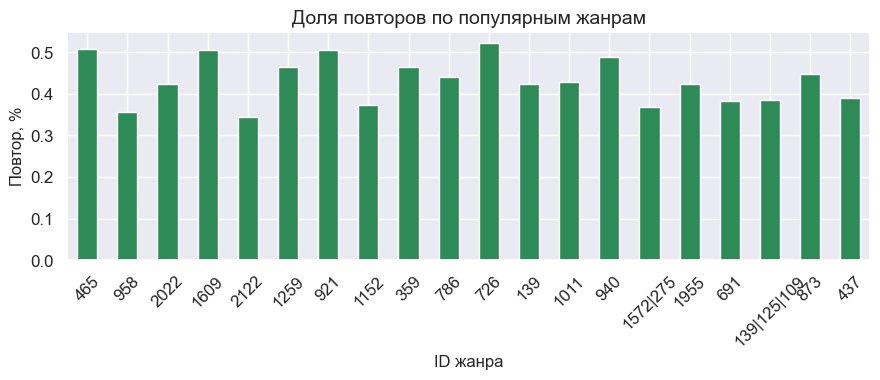

In [28]:
g_stat = songs[['song_id','genre_ids']].merge(train, on='song_id')
g_stat = g_stat.groupby('genre_ids')['target'].mean().loc[top_genres.index]
plt.figure(figsize=(9,4))
g_stat.plot(kind='bar', color='seagreen')
plt.title('Доля повторов по популярным жанрам')
plt.xlabel('ID жанра'); plt.ylabel('Повтор, %'); plt.xticks(rotation=45)
plt.tight_layout(); plt.show()


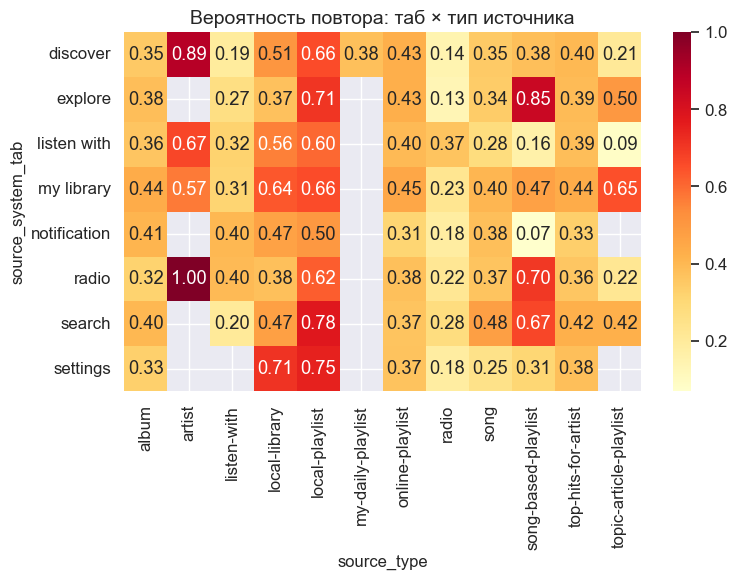

In [29]:
pivot = train.pivot_table(values='target',
                          index='source_system_tab',
                          columns='source_type',
                          aggfunc='mean')
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Вероятность повтора: таб × тип источника')
plt.xlabel('source_type'); plt.ylabel('source_system_tab')
plt.tight_layout(); plt.show()


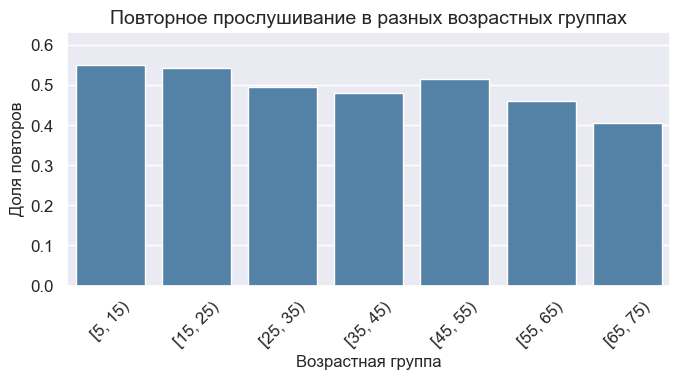

In [31]:
# --- 1. расчёт среднего таргета по возрастным «коробкам» ---
age = members[['msno', 'bd']].merge(train[['msno', 'target']], on='msno')
age = age[(age['bd'] > 5) & (age['bd'] < 75)]              # убираем аномалии

bins = pd.interval_range(start=5, end=75, freq=10, closed='left')
age['age_bin'] = pd.cut(age['bd'], bins=bins)

mean_target = (
    age.groupby('age_bin', observed=True)['target']
        .mean()
        .reset_index()
        .sort_values('age_bin')
)

# --- 2. визуализация ---
plt.figure(figsize=(7, 4))
sns.barplot(
    data=mean_target,
    x='age_bin', y='target',
    color='steelblue'
)
plt.title('Повторное прослушивание в разных возрастных группах')
plt.xlabel('Возрастная группа'); plt.ylabel('Доля повторов')
plt.xticks(rotation=45)
plt.ylim(0, mean_target['target'].max() * 1.15)            # чуть воздуха сверху
plt.tight_layout()
plt.show()